## Introducción
### ¿Cuál es el automóvil más económico y confiable que puedo comprar, considerando que lo necesito para uso diario en la ciudad?

**cliente 1:**
Estoy buscando un auto principalmente para movilizarme en la ciudad. No me interesa que sea de lujo, pero sí que sea económico en precio (entre 8,000 y 15,000 USD) y en consumo de combustible. Prefiero que tenga transmisión automática, porque me resulta más cómoda en el tráfico. No me importa mucho la marca, pero quiero que el auto tenga un kilometraje bajo y que no sea demasiado antiguo (idealmente de los últimos 10 años). El presupuesto que tengo es limitado, así que necesito que el vehículo esté en buen estado y que sea accesible en precio. 

## Librerías y ajuste de parámetros

In [1]:
import sys
sys.path.append('..')

from src.utils import configurar_graficas, track_data_reduction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

configurar_graficas()

## Carga de datos

Se cargarán los datos de 'carros_parte2.csv' y se inspeccionarán inicialmente para entender su estructura y contenido.

In [2]:
data = pd.read_csv('../Data/carros_parte2.csv',  parse_dates=['year_produced'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16747 entries, 0 to 16746
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   manufacturer_name  16747 non-null  object        
 1   model_name         16747 non-null  object        
 2   transmission       16747 non-null  object        
 3   color              16747 non-null  object        
 4   odometer_value     16747 non-null  int64         
 5   year_produced      16747 non-null  datetime64[ns]
 6   engine_fuel        16747 non-null  object        
 7   engine_has_gas     16747 non-null  bool          
 8   engine_type        16747 non-null  object        
 9   engine_capacity    16747 non-null  float64       
 10  body_type          16747 non-null  object        
 11  has_warranty       16747 non-null  bool          
 12  state              16747 non-null  object        
 13  drivetrain         16747 non-null  object        
 14  price_

## Filtrado por año de producción (2009 en adelante)

De acuerdo con las especificaciones solicitadas por la cliente, se prioriza la búsqueda de automóviles recientes para garantizar mejor rendimiento y menor desgaste, Como primer paso del análisis, se aplicará un filtro para seleccionar únicamente los vehículos fabricados en los últimos 10 años.

C:\Users\david\AppData\Local\Temp\ipykernel_24728\1373977034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year_2009["year_produced"] = data_year_2009["year_produced"].dt.year


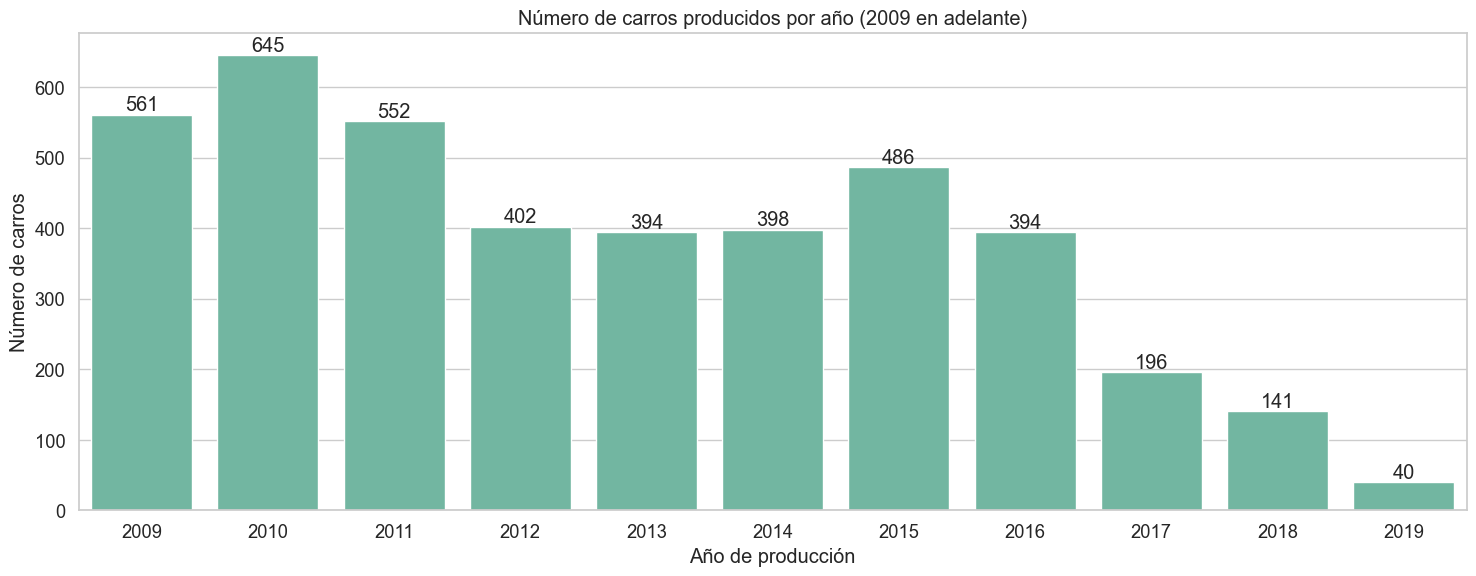

Año de producción 2009 en adelante: 16747 -> 4209 filas (12538 eliminadas, 74.9% reducción)


In [ ]:
data_year_2009 = data[data['year_produced'] >= '2009-01-01']
data_year_2009["year_produced"] = data_year_2009["year_produced"].dt.year  

plt.figure(figsize=(15, 6))
ax = sns.countplot(data=data_year_2009, x='year_produced') 

plt.title('Número de carros producidos por año (2009 en adelante)')
plt.bar_label(ax.containers[0])
plt.xlabel('Año de producción')
plt.ylabel('Número de carros')
plt.tight_layout()
plt.show()

track_data_reduction(data, data_year_2009, filter_name='Año de producción 2009 en adelante')

Se realizó el filtrado de los automóviles producidos en los últimos 10 años y como se aprecia en la gráfica, hay mas autos entre el año 2009 y 2015, lo que es mas probalbe que sea seleccionado un auto de esos años. Ahora, se aplicará un nuevo filtro considerando el rango de precios establecido: vehículos con un valor mayor a 8.000 USD y menor a 15.000 USD.

## Filtrado por precio y transmisión

In [5]:
price = data_year_2009[(data_year_2009['price_usd'] >= 8000) & (data_year_2009['price_usd'] <= 15000)]
transmission_automatic = price[price['transmission'] == 'automatic']
track_data_reduction(data_year_2009, transmission_automatic, filter_name='Fabricación de autos 2009 en adelante, precio económico y transmisión automática')

Fabricación de autos 2009 en adelante, precio económico y transmisión automática: 4209 -> 1163 filas (3046 eliminadas, 72.4% reducción)


El cliente solicita además que el vehículo sea económico en el consumo de combustible. Aunque el dataset no incluye una variable directa que indique dicho consumo, se identificaron algunas variables que permiten aproximar este comportamiento: "engine fuel", "engine type", "engine capacity" y "drivetrain".

Con base en estas variables, se aplicará un nuevo filtrado del dataset para identificar los autos con menor gasto de combustible. Cabe resaltar que dentro del dataset también se encuentran automóviles eléctricos. No obstante, para mantener una mayor organización en el análisis, estos vehículos se presentarán de forma diferenciada al final del estudio, donde se compararán con los de motor de combustión bajo los mismos criterios establecidos.

Ahora, para seguir con el análisis de los autos que usan motor, se realizará una investigación de cada una de las variables mencionadas anteriormente, con el fin de determinar cuáles características son las que más contribuyen al ahorro en el consumo de combustible.

## Selección de motores eficientes

In [13]:
cols = ['engine_fuel', 'engine_type', 'engine_capacity', 'drivetrain']
for col in cols:
    print(f"Valores únicos de {col}:")
    print(transmission_automatic[col].value_counts())
    print("----------------------------------")

Valores únicos de engine_fuel:
engine_fuel
gasoline         937
diesel           169
hybrid-petrol     35
gas               20
electric           2
Name: count, dtype: int64
----------------------------------
Valores únicos de engine_type:
engine_type
gasoline    992
diesel      169
electric      2
Name: count, dtype: int64
----------------------------------
Valores únicos de engine_capacity:
engine_capacity
2.0    273
1.6    194
1.4    186
1.8    165
1.5    148
2.5     59
2.4     30
3.0     27
1.0     15
2.8     11
2.2     10
1.2      9
3.2      9
2.3      8
3.5      5
4.2      3
2.7      3
0.0      2
1.9      2
4.0      1
3.7      1
1.3      1
1.7      1
Name: count, dtype: int64
----------------------------------
Valores únicos de drivetrain:
drivetrain
front    966
all      195
rear       2
Name: count, dtype: int64
----------------------------------


Tras realizar la investigación, se identificó la siguiente información relevante, la cual servirá como base para aplicar los filtros en cada variable analizada:

In [7]:
# combustible del motor: El combustible "Hybrid-petrol" es más económico en ciudad.
cond_fuel = transmission_automatic['engine_fuel'] == 'hybrid-petrol'

# Tipo de motor: El motor "gasoline" resulta eficiente para uso urbano.
cond_type = transmission_automatic['engine_type'] == 'gasoline'

# Tren motriz: El tracción "front" suele ser más económico en consumo.
cond_drive = transmission_automatic['drivetrain'] == 'front'

# Capacidades del motor: Valores entre 1.0 y 1.6L son más económicos.
cond_capacity = transmission_automatic['engine_capacity'].between(1, 1.6)

low_consumption_vehicles = transmission_automatic[cond_fuel & cond_type & cond_drive & cond_capacity]
track_data_reduction(transmission_automatic, low_consumption_vehicles, filter_name="Consumo bajo de gasolina")

Consumo bajo de gasolina: 1163 -> 16 filas (1147 eliminadas, 98.6% reducción)


Ahora, dado que la cantidad de automóviles se redujo considerablemente después de los filtros aplicados, se realizará una comparación de precios entre los vehículos restantes. Para ello, se elaborará una gráfica de puntos que muestre la relación entre el precio, la marca y el modelo de cada automóvil, lo que permitirá identificar de manera más visual cuáles opciones se ajustan mejor a las especificaciones del cliente.

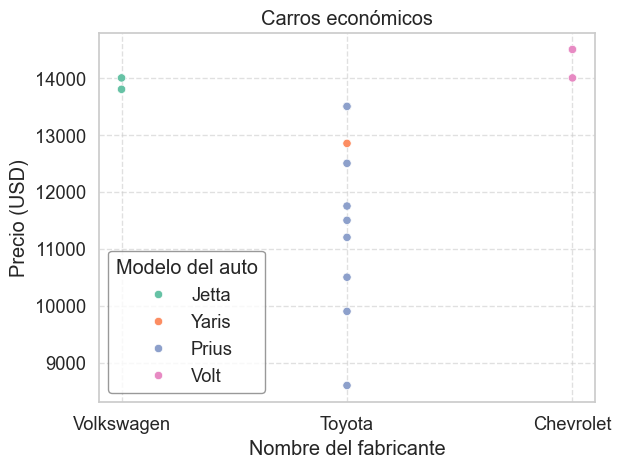

In [8]:
sns.scatterplot(data=low_consumption_vehicles, x='manufacturer_name', y='price_usd', hue='model_name')

plt.title('Carros económicos')
plt.xlabel("Nombre del fabricante")
plt.ylabel("Precio (USD)")
plt.legend(title='Modelo del auto') 
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

En esta gráfica se aprecia que la marca Toyota Prius predomina entre los automóviles filtrados, lo que incrementa la probabilidad de que la elección final corresponda a uno de estos modelos. Posteriormente, se analizará una gráfica comparativa entre el precio y el kilometraje de los vehículos, con el fin de identificar cuáles opciones resultan más favorables para el cliente en términos de economía y menor uso.

## Comparación de precios y kilometraje

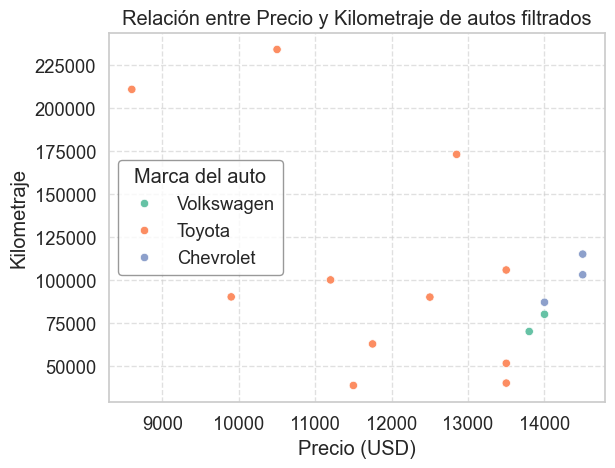

In [9]:
sns.scatterplot(data=low_consumption_vehicles, x='price_usd', y='odometer_value', hue='manufacturer_name')
plt.title("Relación entre Precio y Kilometraje de autos filtrados")
plt.xlabel("Precio (USD)")
plt.ylabel("Kilometraje")
plt.legend(title='Marca del auto') 
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Al observar la gráfica, se identificó que existe una mayor concentración de automóviles con un kilometraje inferior a los 100.000 km, lo que indica que presentan un menor nivel de uso y, por lo tanto, una mayor probabilidad de ser vehículos en mejores condiciones. A partir de este hallazgo, se procederá a analizar únicamente los autos dentro de este rango de kilometraje.

## Conclusiones

### Autos con motor

In [10]:
cond_odometer = low_consumption_vehicles[low_consumption_vehicles['odometer_value'] < 100000]
track_data_reduction(low_consumption_vehicles, cond_odometer, filter_name='Consumo bajo de gasolina y kilometraje menor a 100.000')
cond_odometer.sort_values(by=['odometer_value','price_usd'], ascending=True).head(5)

Consumo bajo de gasolina y kilometraje menor a 100.000: 16 -> 9 filas (7 eliminadas, 43.8% reducción)


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed
14660,Toyota,Prius,automatic,black,38624,2013,hybrid-petrol,False,gasoline,1.5,hatchback,False,owned,front,11499.0,True,Минская обл.,12,18,66
14473,Toyota,Prius,automatic,red,40000,2015,hybrid-petrol,False,gasoline,1.5,hatchback,False,owned,front,13500.0,True,Минская обл.,14,17,46
14414,Toyota,Prius,automatic,silver,51499,2015,hybrid-petrol,False,gasoline,1.5,hatchback,False,owned,front,13500.0,True,Минская обл.,14,41,188
14254,Toyota,Prius,automatic,grey,62764,2014,hybrid-petrol,False,gasoline,1.5,hatchback,False,owned,front,11750.0,False,Минская обл.,25,23,35
8912,Volkswagen,Jetta,automatic,grey,70000,2014,hybrid-petrol,False,gasoline,1.4,sedan,False,owned,front,13800.0,False,Минская обл.,11,1,5


Tras aplicar los diferentes filtros y condiciones solicitadas por el cliente, se muestran los 5 mejores automoviles con motor que cumplen con los criterios establecidos: producción en los últimos diez años, precio en el rango de 8.000 a 15.000 USD, transmisión automática, menor consumo de combustible (según variables de tipo de combustible, tipo y capacidad del motor, y tren motriz), y kilometraje inferior a 100.000 km. Estos vehículos representan las mejores opciones ajustadas a las necesidades planteadas, por lo que el cliente podrá seleccionar el que más le convenga con la seguridad de que cumplen con los requisitos definidos.

### Autos eléctricos

In [11]:
electric_car = transmission_automatic[transmission_automatic['engine_fuel'] == 'electric']
track_data_reduction(transmission_automatic, electric_car, filter_name='transmisión automática y autos eléctricos')
electric_car.head(5)

transmisión automática y autos eléctricos: 1163 -> 2 filas (1161 eliminadas, 99.8% reducción)


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed
901,Fiat,500,automatic,orange,27000,2013,electric,False,electric,0.0,hatchback,False,owned,front,14900.0,True,Минская обл.,11,13,77
16345,Chevrolet,Volt,automatic,silver,168000,2013,electric,False,electric,0.0,liftback,False,owned,front,12950.0,True,Минская обл.,21,5,6


De forma complementaria, también se analizaron los automóviles eléctricos presentes en el dataset. Bajo estas condiciones, el vehículo que mejor se adapta es el Fiat 500 (2013), ya que cuenta con el kilometraje más bajo en comparación con los demás eléctricos, transmisión automática, un año de producción dentro del rango establecido y un precio cercano a los 15.000 USD sin superarlo. Aunque el Chevrolet Volt presenta un precio más bajo, su kilometraje es considerablemente mayor, lo que lo convierte en una opción menos atractiva.

En conclusión, el cliente dispone de un conjunto de opciones claras: cinco autos con motor altamente eficientes y un modelo eléctrico que destaca entre sus pares. La decisión final dependerá de sus preferencias entre optar por un vehículo de motor tradicional optimizado para bajo consumo o dar el salto hacia un automóvil eléctrico con menor uso.